In [1]:
from base import np
from threeD import Solver3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients3D/"

## Results for different Bacterial Concentrations

These Bacterial Profiles need to be normalised, since theoretically, $r \in [R_{\text{Diatom}}, \infty)$.

$$\int_{R_{\text{Diatom}}}^{\infty} c(r) \cdot 4\pi r^2 \; dr = 1$$

In [4]:
syst_params = {
'R_dtm' : 1.0, 'R_inf' : 1000,
'L' : 20,
'Tc': 1e-3, # WTF ¿?¿?¿?
'nr': 10000, # 100_000
}

R_dtm, R_inf, L = syst_params['R_dtm'], syst_params['R_inf'], syst_params['L']

___
### 0. Radial-Constant Concentration ❌📄

In [3]:
# def c_const(r):
#     '''Does not make physical sense, but it is useful for testing purposes'''
#     return np.ones_like(r)

# S3D = Solver3D(syst_params, c_const)

# S3D.ode.solve()
# S3D.ode.analyt.solve_c_const()
# S3D.plot.double_plot()

# S3D.ode.analyt.prints()

**Numerical Solution**
$$
n(r) = 2.736 \cdot 10^{-13717} \, \frac{\sinh(31.622⋅r - 31.622)}{r}
$$
**RuntimeWarning Errors**
- Overflow in `sinh`
- Overflow in `cosh`
- Invalid value encountered in multiply

The exponential growth of the hyperbolic functions leads to numerical overflow,
they produce numbers that are too large to be represented within floating-point precision limits.

**Invalid value encountered in multiply** occurs when trying to multiply numbers that include `NaN` or `Inf`. THese values result from previous overflow operations or the exponent exceeding the floating-point range by far $\approx 10^{13717}$.

___
### 1. Exponential Decay Concentration ❌📄

$$
c_{exp}(r; \lambda) = \frac{1}{4 \pi \lambda \, r^{2}} \mathrm{e}
^{- \frac{r - R_D}{\lambda}}, \quad \lambda>0
$$

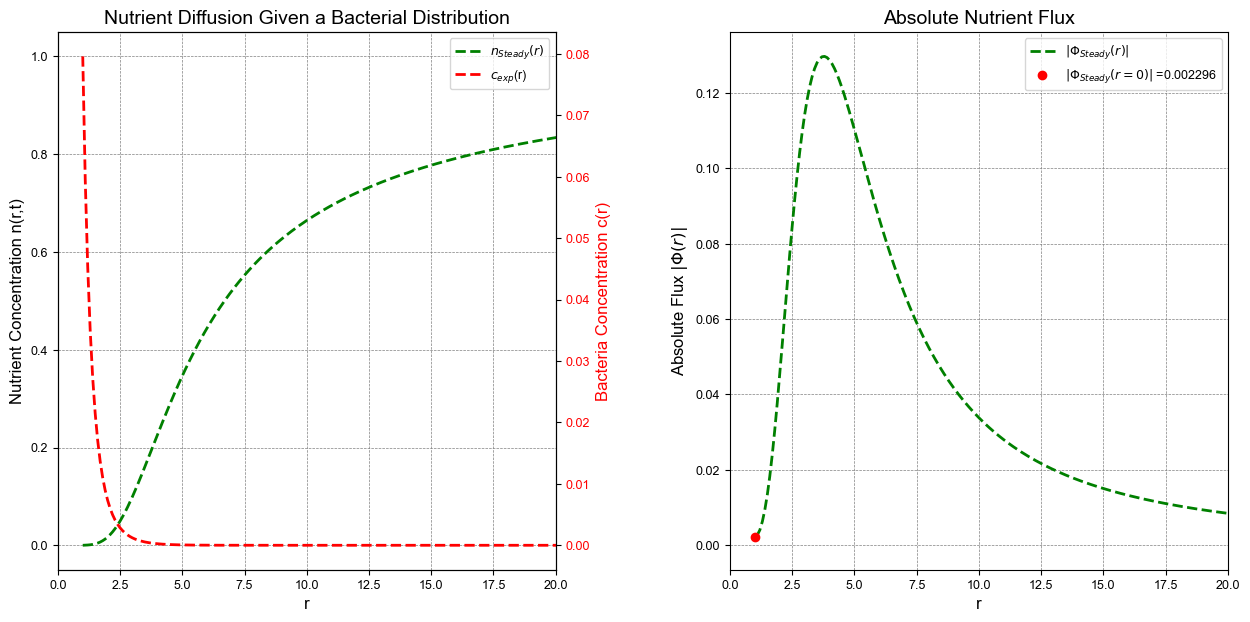

In [5]:
def c_exp(r):
    λ = 1 # > 0
    A = 1 / (4 * np.pi * λ * r**2)
    return A * np.exp( (R_dtm - r)/λ )

S3D = Solver3D(syst_params, c_exp)

S3D.ode.solve()
S3D.plot.double_plot(xlim=(0, L))

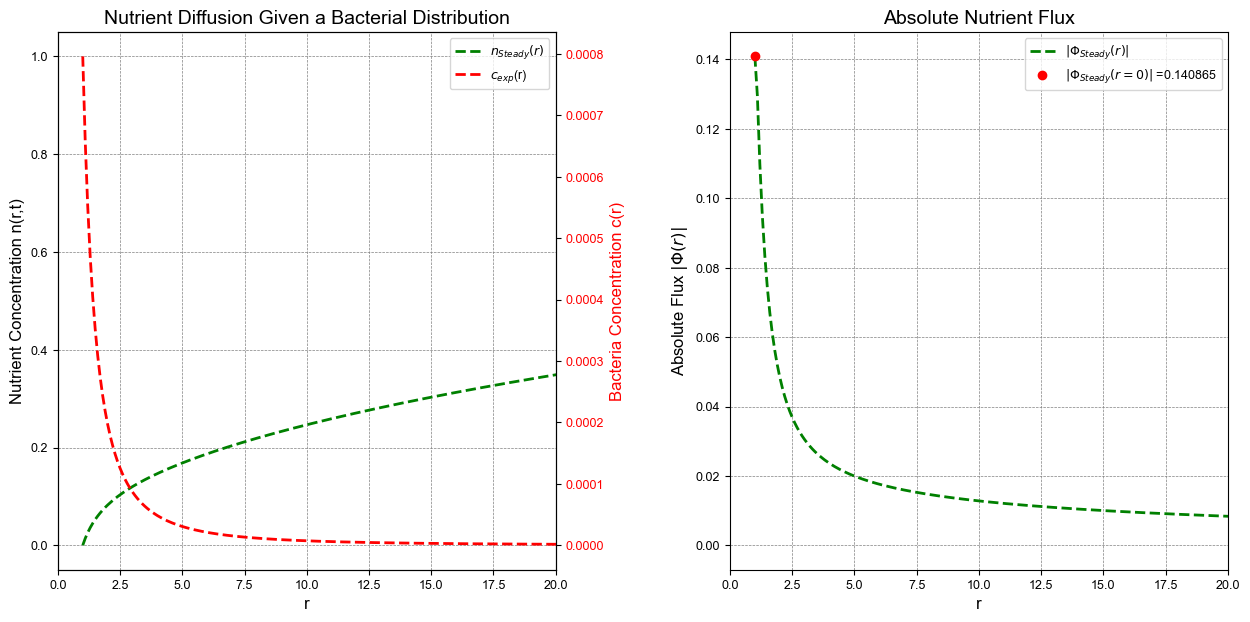

In [6]:
def c_exp(r):
    λ = 100 # > 0
    A = 1 / (4 * np.pi * λ * r**2)
    return A * np.exp( (R_dtm - r)/λ )

S3D = Solver3D(syst_params, c_exp)

S3D.ode.solve()
S3D.plot.double_plot(xlim=(0, L))

### 2. Power-Law Decay Concentrations ❌📄

$$
c_{power}(r; p) = \frac{(p - 3)}{4 \pi} \cdot \frac{R_D^{\;p-3}}{r^{p}}, \quad p > 3
$$

In [15]:
def c_power(r):
    p = 6 # > 3 
    A = (p - 3) / (4 * np.pi)
    return A * R_dtm**(p-3) / r**p
# S3D = Solver3D(syst_params, c_power)
# S3D.ode.solve()
# S3D.plot.double_plot()

___
### 3. Spherical Shell Concentration ❌📄

$$\int_{R_D}^{\infty} c(r) 4 \pi r^2 \; dr = 1$$

where
$c(r)= 
\begin{cases}
C & \text{if} \; r \in [r_0,r_0 +\lambda], \\
0 & \text{otherwise}.
\end{cases}$

$$\int_{r_0}^{r_0 +\lambda} r^2 \, dr =  \frac{(r_0 +\lambda)^3 - r_0^3}{3} = \frac{1}{4 \pi C}
$$

$$
c_{\text{shell}}(r; r_0,\lambda) = 
\begin{cases} 
\frac{3}{4 \pi} \frac{1}{\lambda^3 + 3\lambda^2 r_0 + 3\lambda r_0^2} & \text{if } r_0 \leq r \leq r_0 +\lambda, \\
0 & \text{otherwise}.
\end{cases}
$$

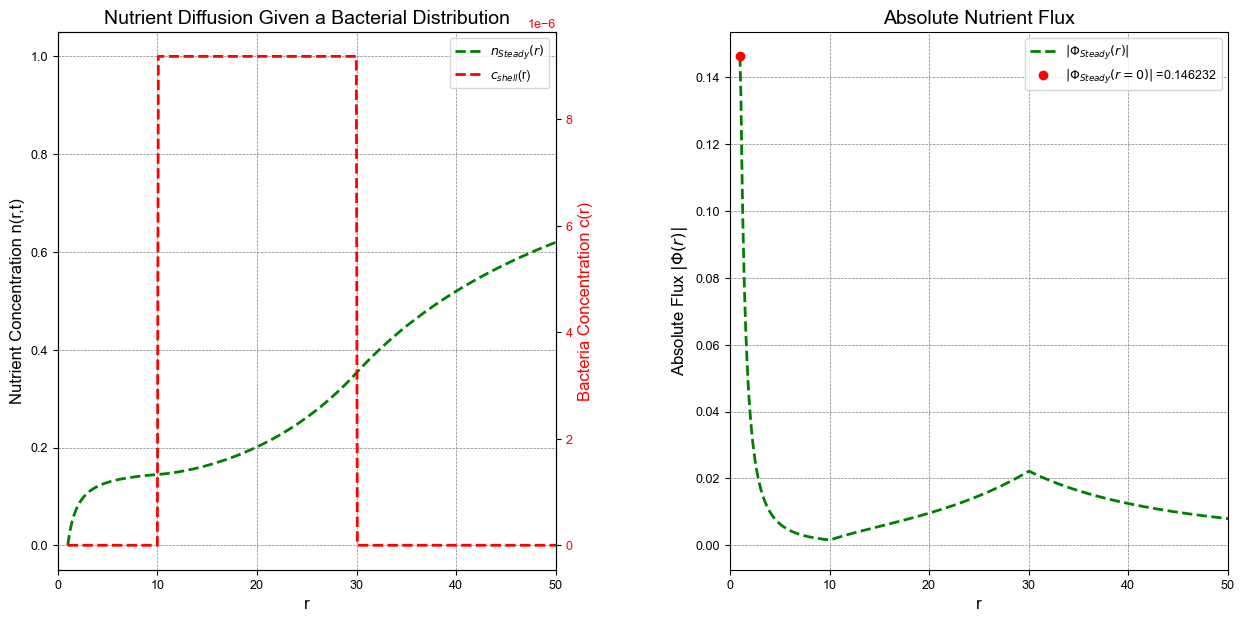

In [ ]:
def c_shell(r):
    r0 = 10 # Starting point of the step
    l  = 20 # Length of the step
    cond = (r >= r0) & (r <= r0 + l)
    c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
    return np.where(cond , c , 0)

# S3D = Solver3D(syst_params, c_shell)

# S3D.ode.solve()
# S3D.plot.double_plot(xlim=(0, L))

### 4. Sharp Shell Concentration ❌📄

$$\int_{R_D}^{\infty} c(r) 4 \pi r^2 \; dr = 1$$

where
$c(x)= 
\begin{cases}
\frac{C}{4 \pi r^2} & \text{if } x \in [r_0,r_0 + l], \\
0 & \text{otherwise}.
\end{cases}$

$$\int_{r_0}^{r_0 + l} C \; dr = 1$$

$$
c_{\text{sharp}}(r; r_0,l) = 
\begin{cases} 
\frac{1}{4 \pi l} \frac{1}{r^2} & \text{if } r_0 \leq r \leq r_0 + l, \\
0 & \text{otherwise}.
\end{cases}
$$

In [17]:
def c_sharp(r):
    r0 = 10 # Starting point of the step
    l  = 20 # Length of the step
    cond = (r >= r0) & (r <= r0 + l)
    c = (4*np.pi*l*r**2)**(-1)
    return np.where(cond , c, 0)
# S3D = Solver3D(syst_params, c_sharp)
# S3D.ode.solve()
# S3D.plot.double_plot()

In [18]:
def c_sharp(r):
    r0 = 30 # Starting point of the step
    l  = 40 # Length of the step
    cond = (r >= r0) & (r <= r0 + l)
    c = (4*np.pi*l*r**2)**(-1)
    return np.where(cond , c , 0)
# S3D = Solver3D(syst_params, c_sharp)
# S3D.ode.solve()
# S3D.plot.double_plot()